In [30]:

import numpy as np
from pymatgen.phonon.plotter import PhononBSPlotter
from mp_api.client import MPRester
import matplotlib.pyplot as plt
from scipy.stats import linregress
from mp_api.client import MPRester



In [ ]:
mp_key = "fShF0m8lEepeLAjHYRHR50cMgpJGq7yr"
mp_id = "mp-16763"
with MPRester(mp_key) as m:
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

### Structure de bandes des phonons

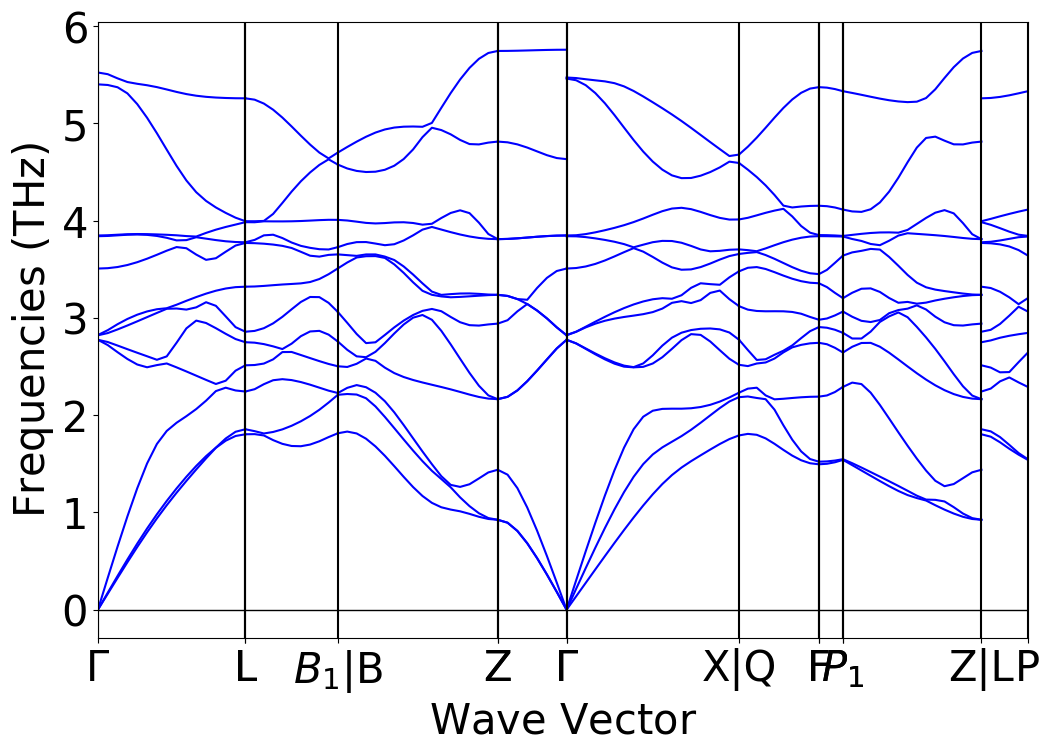

In [32]:
plotter = PhononBSPlotter(ph_bs)
bs = plotter.bs_plot_data()
plotter.show()

On remarque que les directions des branches acoustiques sont:
- Γ-L
- Z-Γ
- Γ-X|Q

### Zone de Brillouin 

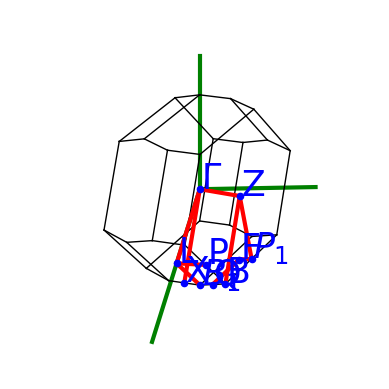

In [33]:
plotter.plot_brillouin()

### Calcul de la vitesse du son dans les 3 branches acoustiques différentes dans 3 directions différentes de la zone de Brillouin

Pour chaque direction :
   - On extrait les **fréquences des 3 premières branches acoustiques** (ce sont les bandes où la fréquence du phonon associée est nulle au centre de la zone de Brillouin).
   - On calcule la pente 
   - La pente $\frac{df}{dk}$ est convertie en **vitesse du son** avec la formule : $v$ = 2 $\pi$ $\cdot$ $\left| \frac{df}{dk} \right|$ 
    
     où :
     - $f$ est la fréquence (en THz),
     - $k$ est le vecteur d’onde (en Å⁻¹),
     - $v$ est la vitesse en m/s.
 


In [34]:
data = plotter.bs_plot_data()
frequency = data['frequency']
distances = data['distances']


def compute_velocity(f1, f0, d1, d0):
    slope = (f1 - f0) * 1e12 / ((d1 - d0) * 1e10) # Conversion en [m/s] : 2π * df/dk * 1e12 / 1e10
    return 2 * np.pi * np.abs(slope)

# Calcul des vitesses pour 3 branches acoustiques spécifiques
v1 = compute_velocity(frequency[0][1][1], frequency[0][1][0], distances[0][1], distances[0][0])  # Γ-X
v2 = compute_velocity(frequency[3][0][-1], frequency[3][0][-2], distances[3][-1], distances[3][-2])  # K-Γ
v3 = compute_velocity(frequency[4][2][1], frequency[4][2][0], distances[4][1], distances[4][0])  # Γ-L

# Affichage des vitesses calculées
print(f"Vitesse 1 (Γ-L) ≈ {v1:.2f} m/s")
print(f"Vitesse 2 (Z-Γ) ≈ {v2:.2f} m/s")
print(f"Vitesse 3 (Γ-X|Q) ≈ {v3:.2f} m/s")

Vitesse 1 (Γ-L) ≈ 1979.83 m/s
Vitesse 2 (Z-Γ) ≈ 2085.35 m/s
Vitesse 3 (Γ-X|Q) ≈ 3520.52 m/s


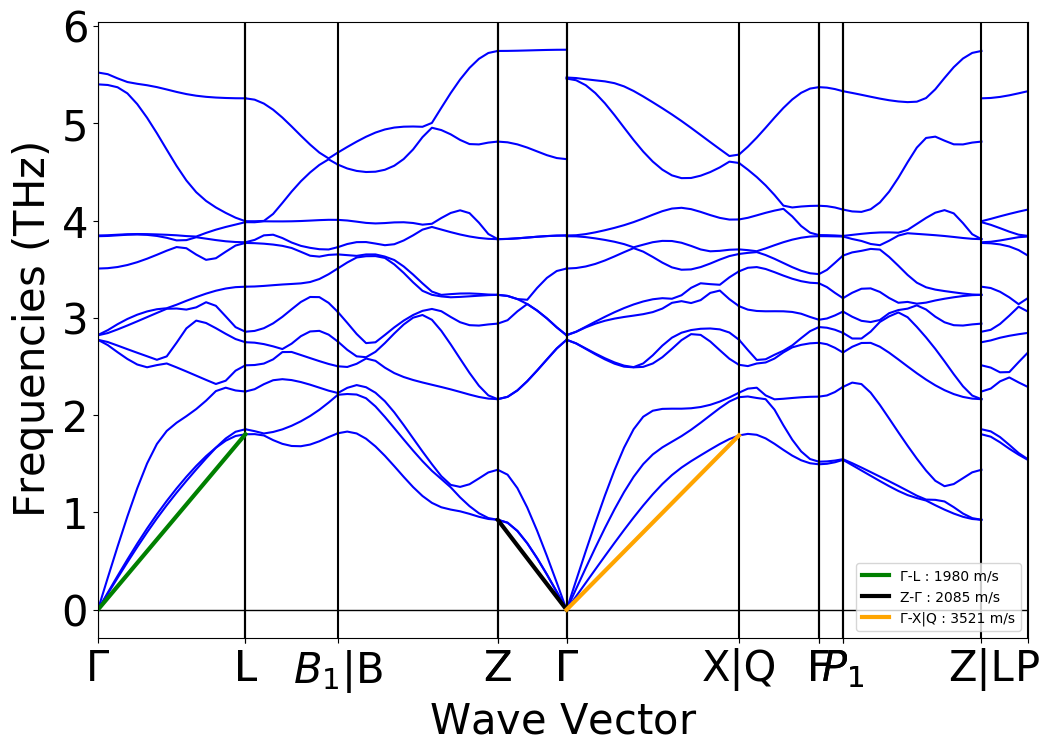

In [ ]:
# Tracé du graphe avec les pentes superposées
ax = plotter.get_plot()

# Pente verte pour Γ-L
line1, = ax.plot([distances[0][0], distances[0][-1]],
                 [frequency[0][1][0], frequency[0][0][-1]], color='green', lw=3)
# Pente noire pour Z-Γ
line2, = ax.plot([distances[3][0], distances[3][-1]],
                 [frequency[3][0][0], frequency[3][0][-1]], color='black', lw=3)
# Pente orange pour Γ-X|Q
line3, = ax.plot([distances[4][0], distances[4][-1]],
                 [frequency[4][0][0], frequency[4][0][-1]], color='orange', lw=3)

ax.legend(
    [line1, line2, line3],  
    [
        f"Γ-L : {v1:.0f} m/s",  
        f"Z-Γ : {v2:.0f} m/s",  
        f"Γ-X|Q : {v3:.0f} m/s"   
    ]
)
